In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Load the data
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [27]:
 # Taken data subset so that we can draw the Graph in 2D, in Real we take all the dataset.
sub_data = dataset.iloc[ :, 3:5].values

In [35]:
type(sub_data)

numpy.ndarray

In [36]:
pd.DataFrame(sub_data).head()

0   1
0  15  39
1  15  81
2  16   6
3  16  77
4  17  40

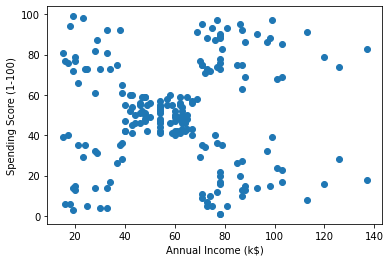

In [37]:
plt.scatter(x = dataset['Annual Income (k$)'], y = dataset['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Build our K-Means Model

1. Identify number of K (Cluster)
2. Choose Centroid (K-Means++)

#### For practise: let us choose a random value of K  = 2

In [29]:
from sklearn.cluster import KMeans

In [41]:
classifier = KMeans(n_clusters= 2, init='k-means++')

In [42]:
classifier.fit(sub_data)

KMeans(n_clusters=2)

In [39]:
classifier.inertia_ # WCSS - within cluster sum square

181363.59595959607

In [32]:
cluster_1_pred = classifier.predict(sub_data)

In [33]:
cluster_1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [14]:
sub_data_cl_2 = sub_data.copy()

In [15]:
sub_data_cl_2.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

In [18]:
sub_data_cl_2['Cluster'] = cluster_1_pred

In [19]:
sub_data_cl_2.head()

Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        0
1                  15                      81        0
2                  16                       6        0
3                  16                      77        0
4                  17                      40        0

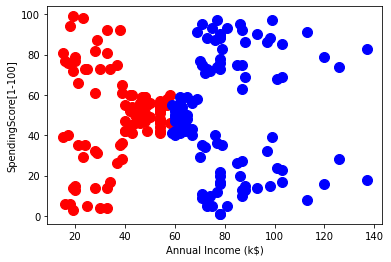

In [38]:
plt.scatter(sub_data[cluster_1_pred == 0, 0], sub_data[cluster_1_pred == 0, 1], s = 100, c = 'red', label='cluster 1')
plt.scatter(sub_data[cluster_1_pred == 1, 0], sub_data[cluster_1_pred == 1, 1], s = 100, c = 'blue', label='cluster 2')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore[1-100]')
plt.show()

In [20]:
sub_data.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

In [25]:
sub_data.iloc[ cluster_1_pred == 0 , 0]

0      15
1      15
2      16
3      16
4      17
       ..
172    87
174    88
176    88
178    93
182    98
Name: Annual Income (k$), Length: 152, dtype: int64

### Let us identify Optimal value of K
Elbow - Matrix

In [44]:
wcss = []
for k in range(1,10):
    classifier_k = KMeans(n_clusters= k, init='k-means++')
    classifier_k.fit(sub_data)
    wcss.append(classifier_k.inertia_)


In [45]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30227.60651315203,
 25029.25342493588,
 22826.19466089466]

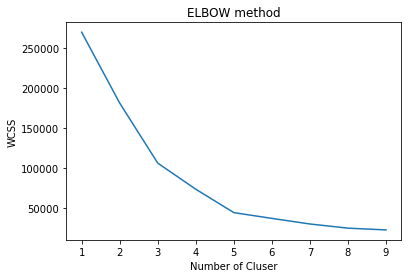

In [46]:
# Elbow Methof / Graph
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Cluser')
plt.ylabel('WCSS')
plt.title('ELBOW method')
plt.show()

#### Elbow Graph is showing the Optimal Number of Cluster is 5

In [48]:
classifier_5 = KMeans(n_clusters= 5, init='k-means++')
classifier_5.fit(sub_data)
cluster_5 = classifier_5.predict(sub_data)

In [49]:
cluster_5

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

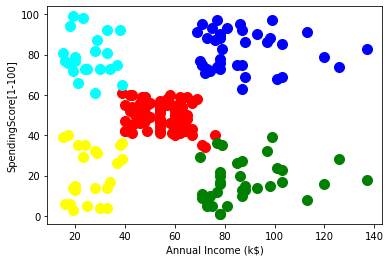

In [54]:
plt.scatter(sub_data[cluster_5 == 0, 0], sub_data[cluster_5 == 0, 1], s = 100, c = 'red', label='cluster 1')
plt.scatter(sub_data[cluster_5 == 1, 0], sub_data[cluster_5 == 1, 1], s = 100, c = 'blue', label='cluster 2')
plt.scatter(sub_data[cluster_5 == 2, 0], sub_data[cluster_5 == 2, 1], s = 100, c = 'green', label='cluster 3')
plt.scatter(sub_data[cluster_5 == 3, 0], sub_data[cluster_5 == 3, 1], s = 100, c = 'yellow', label='cluster 4')
plt.scatter(sub_data[cluster_5 == 4, 0], sub_data[cluster_5 == 4, 1], s = 100, c = 'cyan', label='cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore[1-100]')
plt.show()

#### We try tell the persona of the group

In [55]:
dataset['Cluster'] = cluster_5

In [56]:
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        4  
2        3  
3        4  
4        3

In [57]:
dataset.Cluster.value_counts()

0    81
1    39
2    35
3    23
4    22
Name: Cluster, dtype: int64

In [58]:
dataset[dataset['Cluster'] == 4]

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
1            2    Male   21                  15                      81   
3            4  Female   23                  16                      77   
5            6  Female   22                  17                      76   
7            8  Female   23                  18                      94   
9           10  Female   30                  19                      72   
11          12  Female   35                  19                      99   
13          14  Female   24                  20                      77   
15          16    Male   22                  20                      79   
17          18    Male   20                  21                      66   
19          20  Female   35                  23                      98   
21          22    Male   25                  24                      73   
23          24    Male   31                  25                      73   
25          26    Male   29                  28                      82   
27          28    Male   35                  28                      61   
29          30  Female   23                  29                      87   
31          32  Female   21                  30                      73   
33          34    Male   18                  33                      92   
35          36  Female   21                  33                      81   
37          38  Female   30                  34                      73   
39          40  Female   20                  37                      75   
41          42    Male   24                  38                      92   
45          46  Female   24                  39                      65   

    Cluster  
1         4  
3         4  
5         4  
7         4  
9         4  
11        4  
13        4  
15        4  
17        4  
19        4  
21        4  
23        4  
25        4  
27        4  
29        4  
31        4  
33        4  
35        4  
37        4  
39        4  
41        4  
45        4

Key take away from Clustering

1. Demographic (Age, Gener, Income, Locality)
2. Financial Transaction
3. Behavior Data
3. social Data